**Lab 3: Spectral Representation**

The goal of this lab is to gain familiarity with the spectral representations in Python, specially the spectrograms.

In [56]:
!git clone https://github.com/pzinemanas/sis1lab.git

import os
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
from IPython.display import Audio

from sis1lab.util import load_audio, plot_signals, plot_spectrogram, plot_mean_spectrogram, plot_spectrum_at

fatal: destination path 'sis1lab' already exists and is not an empty directory.


First upload your reference signal and plot the first seconds of it.

In [57]:
!git clone https://github.com/Alejandro-FA/sis1_group0.git

fatal: destination path 'sis1_group0' already exists and is not an empty directory.


In [58]:
filepath = "./sis1_group0/resources/Mandolin_Tuner.wav"
ref, fs = load_audio(filepath)

plot_signals(ref, fs,t_start=0, t_end=3.0)

# **Exercises**

**1. Spectrograms**

A spectrogram is found by estimating the frequency content in short sections of the signal. The magnitude of the spectrum over individual sections is plotted as intensity or color on a two-dimensional plot versus frequency and time. The length of each section, or window length, determines the frequency resolution. Longer windows give good frequency resolution but fail to
track frequency changes well. Shorter windows have poor frequency resolution, but good tracking.

In Python the function `spectrogram` from the `scipy.signal` package will
compute the spectrogram. A common call to the function is defined as follows. No need to understand the meaning of each parameter at this stage. Note that we provide the `plot_spectrogram` function to plot the spectrogram.

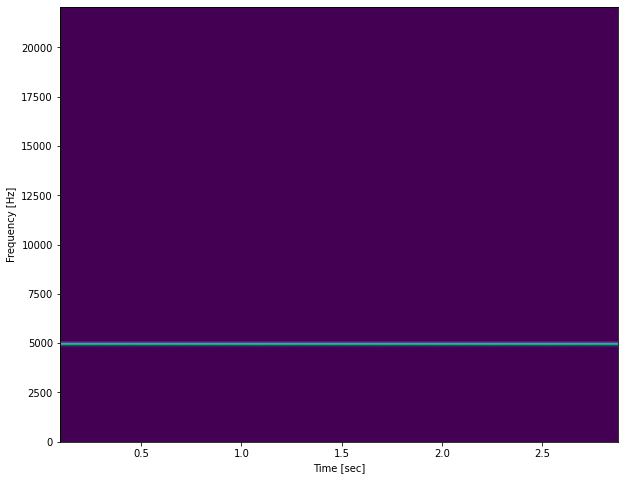

In [59]:
from scipy import signal

#define signal
A = 0.8
f0 = 5000.0
phi = np.pi/2
fs_example = 44100
t = np.arange(0, 3, 1.0/fs)
x = A * np.cos(2*np.pi*f0*t + phi)

# calculate the spectrogram
window_length = 8192
ff, tt, S = signal.spectrogram(x, fs_example, nperseg=window_length, noverlap=window_length/2)

# plot the spectrogram
plt.figure(figsize=(10,8))
plot_spectrogram(ff, tt, S)
plt.show()

We can plot the spectrum of the signal at an specific time using the `plot_spectrum_at` function. For instance, we can see the spectrum of the signal at the 0.5 seconds:

In [60]:
plot_spectrum_at(ff, tt, S, 0.5)

1.1. Calculate and plot the spectrogram of your reference signal. Use `plt.ylim` to select the limits of the y axis in order to zoom in the region of interest. For instance if you want to see the region between 0 and 4000 Hz, you can call `plt.ylim([0, 4000])` after the `plot_spectrogram` function.


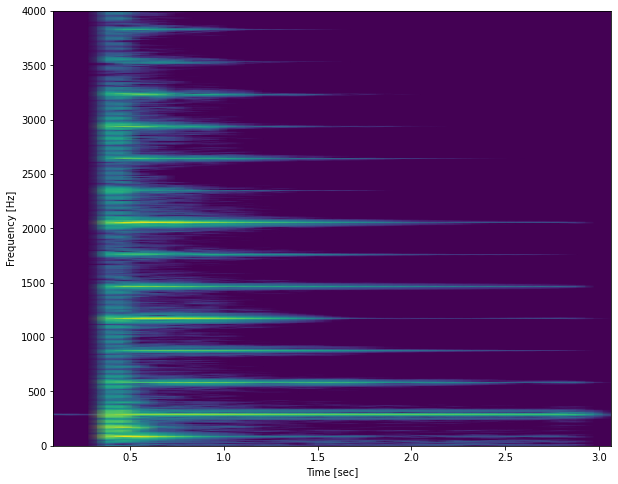

In [61]:


# calculate the spectrogram
window_length = 8192
ff, tt, S = signal.spectrogram(ref, fs, nperseg=window_length, noverlap=window_length/2)
#the ref signal is the one we previously loaded

# plot the spectrogram
plt.figure(figsize=(10,8))
plot_spectrogram(ff, tt, S)
plt.ylim([0,4000])
plt.show()

# Firstly, we can observe that the fundamental frequency is around 300Hz, what we saw in Lab 1 and 2.
# Secondly, there is a clear periodicity between frequencies, i.e. between harmonics. 

1.2. Select a time where almost all harmonics are present and plot the spectrum at that time.

In [62]:
plot_spectrum_at(ff, tt, S, 1.015)
# We have selected t = 1.015 because it is inside the time range we analysed in Lab 2. 

1.3. Use the cursor for measuring the weights of the fundamental frequency and some harmonics (6-10)

In [63]:
weights = [1, 0.5196, 0.3379, 0.7774, 0.2000, 0.1077, 0.8555, 0.01760, 0.1553, 
           0.0467, 0.0625, 0.00736, 0.00730, 0.0096, 0.01677, 0.0026, 0.0039,
           0.0014, 0.0014, 0.000999, 0.0000887, 0.00256, 0.0000869, 0.0000536
           , 0.0000513, 0.0000757, 0.0000226, 0.0000362, 0.0000203, 0.0000407
           , 0.0000268, 0.0000511, 0.00903]

**2. Synthesis**:

Let's define a function to synthetize an harmonic singal which receives the fundamental frequency ($f_0$) and the weights ($A_k$) of each harmonic and the time vector ($t$). This is similar to what you did in Lab 3- Ex3.2.


In [64]:
def synthesize(f0, phi, Ak, t):
  y = 0
  for k in range(1, len(Ak) + 1):
    y += Ak[k-1] * np.cos(2*np.pi*k*f0*t + k*phi - (k-1)*np.pi/2)
  return y

2.1. Use the `synthetize` function to generate a synthesis with the weights ($A_k$) found in 1.3 and the fundamental frequency and phases found in previous labs. Plot both the reference and the synthetize signal. Listen to the synthetize signal.

In [65]:
# Write the code here
f_0 = 296.08
dt = 1.004338 - 1.003 #Data from Lab 2
phi = -np.pi*f0*2*dt  #Data from Lab 2

t = np.arange(0, 3, 1.0/fs)

synth_signal = synthesize(f_0, phi, weights, t)
plot_signals(ref, fs, name="Reference Signal", t_start=1.0, t_end = 1+9*(1/f_0))
plot_signals([ref, np.real(synth_signal)], fs, name=[ 'Reference Signal', 'Synthesized'], t_start=1.0, t_end = 1+9*(1/f_0))

# We plot both, the reference signal independently and the comparison in order to see if they are similar,
# because the difference of amplitude makes it very hard to analyse. Despite the fact that the scale is very
# different, the shape is quite similiar (it would be just a matter of scaling the volume).
Audio(np.real(synth_signal), rate=fs)


2.2. Calculate the spectrogram of the synthesized signal `S_synt`; and compare the spectrums of both signals at the same time using `plot_spectrum_at(ff, tt, [S_ref, S_synt], time)`, where `S_ref`is spectrogram of the reference signal.

**Note:** use the same window length to calculate both spectrograms.

In [71]:
ff, tt, S_synt = signal.spectrogram(synth_signal, fs, nperseg=window_length, noverlap=window_length/2)
ff, tt, S_ref = signal.spectrogram(ref, fs, nperseg=window_length, noverlap=window_length/2)
plot_spectrum_at(ff, tt, [S_ref, S_synt], 1.015)

2.3. Compare the spectrograms of the two signals. What are the main differences?

We can observe that the first harmonics are quite similar, since we have introduced the amplitudes manually, but once we stop taking the manual amplitudes the signals diverge significantly. 

2.4. Listen to the two audios (reference and synthesized). What are the main differences?

In [67]:
Audio(np.real(ref), rate=fs)

In [68]:

Audio(np.real(synth_signal), rate=fs)

There is a perceptible improvement of the signal with respect to the Lab 2. With that said, it still sounds very artificial and it does not reasemble a Mandolin at all. 

Despite the fact that we have manually added a lot of amplitudes, it didn't work as we expected :( 